# PoP Intensity

- Date: 2025.01.05
- Contact: [Dr. Lázaro Bustio Martínez](lazaro.bustio@ibero.mx).
- Python version: 3.12.8

Determine the intensity level for each principle of persuasion. This code is developed for Python 3.12.8.

# Defining logging

In [1]:
import logging

# Colores ANSI
class LogColors:
    DATE = "\033[1;34m"  # Azul intenso para la fecha
    INFO_BOLD = "\033[1;32m"  # Verde intenso (negrita) para INFO
    INFO = "\033[0;32m"  # Verde suave para INFO (esto lo cambiaré a verde lima)
    WARNING_BOLD = "\033[1;33m"  # Amarillo intenso (negrita) para WARNING
    WARNING = "\033[0;33m"  # Amarillo suave para WARNING
    ERROR_BOLD = "\033[1;31m"  # Rojo intenso (negrita) para ERROR
    ERROR = "\033[0;31m"  # Rojo suave para ERROR
    RESET = "\033[0m"  # Resetear el color

# Formateador personalizado
class ColoredFormatter(logging.Formatter):
    def format(self, record):
        # Formatear la fecha con color azul
        dt = self.formatTime(record, self.datefmt)
        date, time = dt.split(' ')
        colored_date = f"{LogColors.DATE}{date}{LogColors.RESET}"
        colored_time = f"{LogColors.DATE}{time}{LogColors.RESET}"
        
        # Colorear el tipo de mensaje (levelname) y el mensaje del log
        if record.levelname == "INFO":
            record.levelname = f"{LogColors.INFO_BOLD}{record.levelname}{LogColors.RESET}"
            record.msg = f"{LogColors.INFO}{record.msg}{LogColors.RESET}"
        elif record.levelname == "WARNING":
            record.levelname = f"{LogColors.WARNING_BOLD}{record.levelname}{LogColors.RESET}"
            record.msg = f"{LogColors.WARNING}{record.msg}{LogColors.RESET}"
        elif record.levelname == "ERROR":
            record.levelname = f"{LogColors.ERROR_BOLD}{record.levelname}{LogColors.RESET}"
            record.msg = f"{LogColors.ERROR}{record.msg}{LogColors.RESET}"

        # Reemplazar la fecha y hora en el registro
        record.asctime = f"{colored_date} {colored_time}"
        
        return super().format(record)

# Configuración del logger
logger = logging.getLogger("MiLogger")
logger.setLevel(logging.INFO)

# Evitar manejadores duplicados
logger.handlers.clear()

# Manejador de consola con colores
console_handler = logging.StreamHandler()
formato = ColoredFormatter("%(asctime)s: %(levelname)s - %(message)s", datefmt="%Y-%m-%d %H:%M:%S")
console_handler.setFormatter(formato)
logger.addHandler(console_handler)

# Desactivar el logger raíz (limpiar los manejadores raíz)
logging.getLogger().handlers.clear()

# Ejemplo de uso
logger.info("El código comenzó a ejecutarse correctamente.")
logger.warning("Este es un mensaje de advertencia.")
logger.error("Ocurrió un error en el código.")


2025-01-05 01:09:31: INFO - El código comenzó a ejecutarse correctamente.
2025-01-05 01:09:31: WARNING - Este es un mensaje de advertencia.
2025-01-05 01:09:31: ERROR - Ocurrió un error en el código.


# Installing Libraries

In [4]:
logger.info("Instaling required libraries...")

logger.info("Installing pandas...")
!pip install pandas

logger.info("Installing numpy...")
!pip install numpy

logger.info("Installing transformers...")
!pip install transformers

logger.info("Installing torch...")
!pip install torch

!pip install scikit-learn
!pip install matplotlib

logger.info("Liraries installed successfully!")

2025-01-05 01:02:46: INFO - Instaling required libraries...
2025-01-05 01:02:46: INFO - Installing pandas...
2025-01-05 01:02:47: INFO - Installing numpy...


2025-01-05 01:02:48: INFO - Installing transformers...


2025-01-05 01:02:49: INFO - Installing torch...


2025-01-05 01:02:50: INFO - Liraries installed successfully!


# Imports

In [20]:
logger.info("Importing libraries.")

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import torch
from transformers import DistilBertTokenizer, DistilBertModel
import matplotlib.pyplot as plt

2025-01-05 01:44:28: INFO - Importing libraries.


# Data gathering and filtering

In [6]:
logger.info("Reading data file....")

data_df = pd.read_csv('data/pop_dataset_Full(Tiltan).csv', header=1)

pops = ["authority", "distraction", "liking_similarity_deception","social_proof", "commitment_integrity_reciprocation"]
pop = ["authority"]
data = data_df[["id", "path", "hash", "subject", "txt"] + pops + ["class", "label"]]

data_authority = data_df.loc[data_df["authority"] == 1, ["id", "path", "hash", "subject", "txt", "authority", "class", "label"]]
data_authority

2025-01-05 01:14:14: INFO - Reading data file....


,id,path,hash,subject,txt,authority,class,label
22,8003,/content/gdrive/MyDrive/Colabs/02.-Proyectos/P...,ee37cb4350f9b18221d0f447e32793a9,R Re International Tender Egypt Cyber War Depa...,Dear Moniem Here is mobile 39 3357939078 You c...,1,0,Legit
28,7478,/content/gdrive/MyDrive/Colabs/02.-Proyectos/P...,9e988c53447c2c23c1926aa86fe3f30d,Today s headlines from The Boston Globe,To view this email as a web page go to the lin...,1,0,Legit
34,6881,/content/gdrive/MyDrive/Colabs/02.-Proyectos/P...,e34e47e2a0079f382b3f6622f9b02217,domain.com order of The Trembling of a Leaf Li...,Kindle eBooks Your Account domain.com Order Co...,1,0,Legit
60,7459,/content/gdrive/MyDrive/Colabs/02.-Proyectos/P...,8591a3f5136493d15c1e935ecb2308d3,Chris Rock In a Daze As Toronto Buzz Heightens...,Chris Rock and Rosario Dawson stopped by the V...,1,0,Legit
81,6554,/content/gdrive/MyDrive/Colabs/02.-Proyectos/P...,d3031c89204fa2b4f12ef5645291fef3,Contribution Donate to help Democrats new abro...,CONTRIBUTION DATA Page Donate to help Democrat...,1,0,Legit
...,...,...,...,...,...,...,...,...
2086,5690,/content/gdrive/MyDrive/Colabs/02.-Proyectos/P...,b25e8893fae61d623d6810437f8d44ae,Hello You are qualified for a pay raise on your,Hello You are qualified for a pay raise on you...,1,1,Phish
2087,5691,/content/gdrive/MyDrive/Colabs/02.-Proyectos/P...,5dc06913e80aeb595a6a34d5b72626ba,Our record shows that your Mailbox is Out date...,Our record shows that your Mailbox is Out date...,1,1,Phish
2088,5693,/content/gdrive/MyDrive/Colabs/02.-Proyectos/P...,ce0d77e4c83d7499067766195159a562,This e mail is to notify you the staff and,This e mail is to notify you the staff and stu...,1,1,Phish
2090,5697,/content/gdrive/MyDrive/Colabs/02.-Proyectos/P...,d2b71708bc1e7398e0046425f93e8f8d,A Computer Database Maintenance is currently g...,A Computer Database Maintenance is currently g...,1,1,Phish


# Data representation

For each principle of persuasion...

In [15]:
for principle in pop:
  print(principle)

authority


## FastText

Be sure to install Microsoft C++ Build Tools by following the instructions provided in this [Medium article](https://medium.com/@oleg.tarasov/building-fasttext-python-wrapper-from-source-under-windows-68e693a68cbb).

In [1]:
import fasttext

ModuleNotFoundError: No module named 'fasttext'

## DistilBERT

In [16]:
# Cargar el tokenizer y el modelo base de DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertModel.from_pretrained("distilbert-base-uncased")  # Modelo base

In [18]:
# Función para obtener embeddings del texto
def get_embeddings(texts):
    logger.info("Starting to process texts for embeddings...")
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=512)
    logger.info(f"Tokenized {len(texts)} texts.")
    
    with torch.no_grad():
        logger.info("Generating embeddings...")
        outputs = model(**inputs)
    
    # Usamos la media de los embeddings de las palabras (output.last_hidden_state)
    embeddings = outputs.last_hidden_state.mean(dim=1).numpy()
    
    logger.info(f"Generated embeddings with shape: {embeddings.shape}")
    return embeddings

# Obtener embeddings para los textos
embeddings = get_embeddings(data_authority["txt"].tolist())
print("Embeddings:", embeddings.shape)  # Verifica que los embeddings se hayan generado correctamente

2025-01-05 01:40:56: INFO - Starting to process texts for embeddings...
2025-01-05 01:40:58: INFO - Tokenized 661 texts.
2025-01-05 01:40:58: INFO - Generating embeddings...
2025-01-05 01:44:02: INFO - Generated embeddings with shape: (661, 768)


Embeddings: (661, 768)


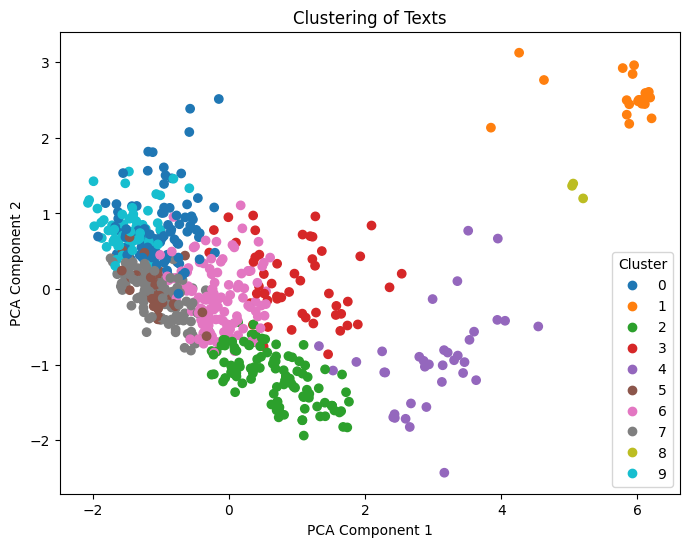

In [32]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

# Clustering usando K-means
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(embeddings)

# Visualización con PCA (reducción de dimensionalidad)
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Crear un mapa de colores para cada cluster
plt.figure(figsize=(8, 6))

# Dibujar los puntos con los colores correspondientes a sus etiquetas de cluster
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=kmeans.labels_, cmap='tab10')

# Título y etiquetas de los ejes
plt.title('Clustering of Texts')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Crear la leyenda manualmente para cada cluster
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title="Cluster")

# Mostrar el gráfico
plt.show()

In [33]:
from sklearn.metrics.pairwise import euclidean_distances

# Obtener los centros de los clusters
cluster_centers = kmeans.cluster_centers_

# Calcular la distancia de cada mensaje al centro del clúster al que pertenece
distances = euclidean_distances(embeddings, cluster_centers)

# Asignar la intensidad basada en la distancia
# Normalización de la distancia a una escala de 1 a 10
max_distance = np.max(distances)
min_distance = np.min(distances)

intensities = 10 * (1 - (distances - min_distance) / (max_distance - min_distance))


# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'Text': data_authority["txt"].tolist(),  # Asegúrate de tener el DataFrame con tus datos
    'Intensity': [intensities[i].max() for i in range(len(intensities))],  # Intensidad calculada
    'Cluster': kmeans.labels_  # Clúster asignado
})

# Mostrar el DataFrame resultante
results

,Text,Intensity,Cluster
0,Dear Moniem Here is mobile 39 3357939078 You c...,7.669931,3
1,To view this email as a web page go to the lin...,8.483514,4
2,Kindle eBooks Your Account domain.com Order Co...,8.280838,6
3,Chris Rock and Rosario Dawson stopped by the V...,8.671561,3
4,CONTRIBUTION DATA Page Donate to help Democrat...,8.241744,3
...,...,...,...
656,Hello You are qualified for a pay raise on you...,8.045434,5
657,Our record shows that your Mailbox is Out date...,8.885761,5
658,This e mail is to notify you the staff and stu...,8.746655,7
659,A Computer Database Maintenance is currently g...,8.468085,2


In [35]:
from sklearn.preprocessing import MinMaxScaler

# Calcular las distancias a los centros de los clústeres
distances_to_centers = np.linalg.norm(embeddings - kmeans.cluster_centers_[kmeans.labels_], axis=1)

# Normalizar las distancias a la escala de 1 a 10
scaler = MinMaxScaler(feature_range=(1, 10))
distances_normalized = scaler.fit_transform(distances_to_centers.reshape(-1, 1))

# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'Text': data_authority["txt"].tolist(),  # Asegúrate de tener el DataFrame con tus datos
    'Intensity': distances_normalized.flatten(),  # Intensidad calculada
    'Cluster': kmeans.labels_  # Clúster asignado
})

# Calcular el rango de intensidad para cada grupo
cluster_ranges = {}
for cluster in np.unique(kmeans.labels_):
    # Obtener las intensidades para el clúster
    intensities_for_cluster = results[results['Cluster'] == cluster]['Intensity']
    min_intensity = intensities_for_cluster.min()
    max_intensity = intensities_for_cluster.max()
    
    # Asignar el rango de intensidad al clúster
    cluster_ranges[cluster] = (min_intensity, max_intensity)

# Asignar el rango de intensidad a cada texto
def get_intensity_range(cluster):
    min_intensity, max_intensity = cluster_ranges[cluster]
    return f"Grupo {cluster + 1}, intensidad de {min_intensity:.2f} a {max_intensity:.2f}"

results['Intensity Range'] = results['Cluster'].apply(get_intensity_range)

# Mostrar el DataFrame resultante
results


,Text,Intensity,Cluster,Intensity Range
0,Dear Moniem Here is mobile 39 3357939078 You c...,4.757196,3,"Grupo 4, intensidad de 2.78 a 7.77"
1,To view this email as a web page go to the lin...,3.445308,4,"Grupo 5, intensidad de 2.41 a 10.00"
2,Kindle eBooks Your Account domain.com Order Co...,3.772119,6,"Grupo 7, intensidad de 2.26 a 7.57"
3,Chris Rock and Rosario Dawson stopped by the V...,3.142085,3,"Grupo 4, intensidad de 2.78 a 7.77"
4,CONTRIBUTION DATA Page Donate to help Democrat...,3.835158,3,"Grupo 4, intensidad de 2.78 a 7.77"
...,...,...,...,...
656,Hello You are qualified for a pay raise on you...,4.151704,5,"Grupo 6, intensidad de 1.48 a 5.00"
657,Our record shows that your Mailbox is Out date...,2.796692,5,"Grupo 6, intensidad de 1.48 a 5.00"
658,This e mail is to notify you the staff and stu...,3.020998,7,"Grupo 8, intensidad de 2.13 a 4.63"
659,A Computer Database Maintenance is currently g...,3.470186,2,"Grupo 3, intensidad de 1.75 a 4.94"


In [38]:
# Calcular el promedio, varianza y desviación estándar para cada grupo (clúster)
group_stats = results.groupby('Cluster')['Intensity'].agg(
    ['mean', 'var', 'std']
).reset_index()

# Mostrar las estadísticas de los grupos
group_stats

,Cluster,mean,var,std
0,0,4.147063,2.672475,1.634771
1,1,2.350197,6.245160,2.499032
2,2,4.256650,3.088029,1.757279
3,3,3.392733,2.758888,1.660990
4,4,3.462621,4.579423,2.139959
5,5,4.536125,5.421326,2.328374
6,6,3.049853,1.860721,1.364082
7,7,4.922618,4.254330,2.062603
8,8,5.077972,20.784323,4.558983
9,9,3.878475,3.969291,1.992308


In [39]:
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

# Calcular el promedio, varianza y desviación estándar para cada grupo (clúster)
group_stats = results.groupby('Cluster')['Intensity'].agg(
    ['mean', 'var', 'std']
).reset_index()

# Mostrar las estadísticas de los grupos
print(group_stats)

# Calcular el índice de silueta para el modelo de clustering
sil_score = silhouette_score(embeddings, kmeans.labels_)
print(f"Silhouette Score: {sil_score:.3f}")

# Calcular la cohesión: distancia intra-clúster (dentro de cada clúster)
cohesion = np.sum([np.sum(np.linalg.norm(embeddings[kmeans.labels_ == i] - kmeans.cluster_centers_[i], axis=1)) for i in range(kmeans.n_clusters)])

# Calcular la separación: distancia entre los centros de los clústeres
separation = np.sum([np.linalg.norm(kmeans.cluster_centers_[i] - kmeans.cluster_centers_[j]) for i in range(kmeans.n_clusters) for j in range(i + 1, kmeans.n_clusters)])

print(f"Cohesión: {cohesion:.2f}")
print(f"Separación: {separation:.2f}")


   Cluster      mean        var       std
0        0  4.147063   2.672475  1.634771
1        1  2.350197   6.245160  2.499032
2        2  4.256650   3.088029  1.757279
3        3  3.392733   2.758888  1.660990
4        4  3.462621   4.579423  2.139959
5        5  4.536125   5.421326  2.328374
6        6  3.049853   1.860721  1.364082
7        7  4.922618   4.254330  2.062603
8        8  5.077972  20.784323  4.558983
9        9  3.878475   3.969291  1.992308
Silhouette Score: 0.093
Cohesión: 1276.06
Separación: 188.60


In [40]:
from sklearn.metrics import silhouette_samples
import numpy as np
import pandas as pd

# Calcular el índice de silueta para cada punto
silhouette_values = silhouette_samples(embeddings, kmeans.labels_)

# Asignar el índice de silueta promedio por grupo
silhouette_scores = []
for cluster in np.unique(kmeans.labels_):
    cluster_silhouette = silhouette_values[kmeans.labels_ == cluster]
    silhouette_scores.append((cluster, np.mean(cluster_silhouette)))

# Mostrar los resultados
silhouette_df = pd.DataFrame(silhouette_scores, columns=["Cluster", "Average Silhouette Score"])
print("Silhouette Scores by Cluster:")
print(silhouette_df)

# Calcular la cohesión para cada clúster: distancia media entre los puntos y el centro
cohesion_scores = []
for cluster in np.unique(kmeans.labels_):
    cluster_points = embeddings[kmeans.labels_ == cluster]
    center = kmeans.cluster_centers_[cluster]
    cohesion = np.mean(np.linalg.norm(cluster_points - center, axis=1))
    cohesion_scores.append((cluster, cohesion))

# Mostrar los resultados
cohesion_df = pd.DataFrame(cohesion_scores, columns=["Cluster", "Cohesion"])
print("\nCohesion Scores by Cluster:")
print(cohesion_df)

# Calcular la separación para cada clúster: distancia promedio entre el centro del clúster y los otros centros
separation_scores = []
for cluster in np.unique(kmeans.labels_):
    separation = np.mean([np.linalg.norm(kmeans.cluster_centers_[cluster] - kmeans.cluster_centers_[other_cluster]) 
                          for other_cluster in np.unique(kmeans.labels_) if other_cluster != cluster])
    separation_scores.append((cluster, separation))

# Mostrar los resultados
separation_df = pd.DataFrame(separation_scores, columns=["Cluster", "Separation"])
print("\nSeparation Scores by Cluster:")
print(separation_df)


Silhouette Scores by Cluster:
   Cluster  Average Silhouette Score
0        0                  0.049541
1        1                  0.661856
2        2                  0.203037
3        3                 -0.006266
4        4                  0.107453
5        5                  0.138165
6        6                  0.019256
7        7                  0.042254
8        8                  0.776873
9        9                  0.009459

Cohesion Scores by Cluster:
   Cluster  Cohesion
0        0  1.953506
1        1  1.424443
2        2  1.680780
3        3  2.311540
4        4  2.512800
5        5  1.661769
6        6  1.980948
7        7  1.847383
8        8  0.815462
9        9  2.153292

Separation Scores by Cluster:
   Cluster  Separation
0        0    3.428956
1        1    6.657465
2        2    3.361962
3        3    3.226220
4        4    4.293737
5        5    3.499420
6        6    3.053917
7        7    3.304044
8        8    7.366435
9        9    3.719375


In [41]:
from sklearn.metrics import silhouette_samples
import numpy as np
import pandas as pd

# Calcular el índice de silueta para cada punto
silhouette_values = silhouette_samples(embeddings, kmeans.labels_)

# Calcular el índice de silueta promedio por grupo
silhouette_scores = []
for cluster in np.unique(kmeans.labels_):
    cluster_silhouette = silhouette_values[kmeans.labels_ == cluster]
    silhouette_scores.append((cluster, np.mean(cluster_silhouette)))

# Calcular la cohesión para cada clúster: distancia media entre los puntos y el centro
cohesion_scores = []
for cluster in np.unique(kmeans.labels_):
    cluster_points = embeddings[kmeans.labels_ == cluster]
    center = kmeans.cluster_centers_[cluster]
    cohesion = np.mean(np.linalg.norm(cluster_points - center, axis=1))
    cohesion_scores.append((cluster, cohesion))

# Calcular la separación para cada clúster: distancia promedio entre el centro del clúster y los otros centros
separation_scores = []
for cluster in np.unique(kmeans.labels_):
    separation = np.mean([np.linalg.norm(kmeans.cluster_centers_[cluster] - kmeans.cluster_centers_[other_cluster]) 
                          for other_cluster in np.unique(kmeans.labels_) if other_cluster != cluster])
    separation_scores.append((cluster, separation))

# Crear un DataFrame con todas las métricas
metrics_df = pd.DataFrame({
    "Cluster": np.unique(kmeans.labels_),
    "Average Silhouette Score": [score[1] for score in silhouette_scores],
    "Cohesion": [score[1] for score in cohesion_scores],
    "Separation": [score[1] for score in separation_scores]
})

# Mostrar el DataFrame final con todas las métricas
print(metrics_df)


   Cluster  Average Silhouette Score  Cohesion  Separation
0        0                  0.049541  1.953506    3.428956
1        1                  0.661856  1.424443    6.657465
2        2                  0.203037  1.680780    3.361962
3        3                 -0.006266  2.311540    3.226220
4        4                  0.107453  2.512800    4.293737
5        5                  0.138165  1.661769    3.499420
6        6                  0.019256  1.980948    3.053917
7        7                  0.042254  1.847383    3.304044
8        8                  0.776873  0.815462    7.366435
9        9                  0.009459  2.153292    3.719375


In [42]:
import scipy.stats as stats

# Calcular las métricas adicionales para cada grupo
group_metrics = []

# Iterar sobre los grupos (clústeres)
for cluster in np.unique(kmeans.labels_):
    # Filtrar las intensidades del grupo
    intensities_for_cluster = results[results['Cluster'] == cluster]['Intensity']
    
    # Calcular las métricas
    avg_intensity = intensities_for_cluster.mean()
    std_dev_intensity = intensities_for_cluster.std()
    variance_intensity = intensities_for_cluster.var()
    kurtosis_intensity = stats.kurtosis(intensities_for_cluster)
    min_intensity = intensities_for_cluster.min()
    max_intensity = intensities_for_cluster.max()
    
    # Obtener el rango de intensidad
    intensity_range = f"De {min_intensity:.2f} a {max_intensity:.2f}"
    
    # Obtener la métrica de separación y cohesión
    cohesion = cluster_metrics[cluster]['Cohesion']
    separation = cluster_metrics[cluster]['Separation']
    silhouette_score = cluster_metrics[cluster]['Silhouette']
    
    # Añadir las métricas al resultado final
    group_metrics.append({
        'Cluster': cluster,
        'Average Silhouette Score': silhouette_score,
        'Cohesion': cohesion,
        'Separation': separation,
        'Average Intensity': avg_intensity,
        'Standard Deviation': std_dev_intensity,
        'Variance': variance_intensity,
        'Kurtosis': kurtosis_intensity,
        'Intensity Range': intensity_range
    })

# Crear el DataFrame final con todas las métricas
metrics_df = pd.DataFrame(group_metrics)

# Mostrar el DataFrame con todas las métricas
metrics_df


NameError: name 'cluster_metrics' is not defined

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Calcular las distancias a los centros de los clústeres
distances_to_centers = np.linalg.norm(embeddings - kmeans.cluster_centers_[kmeans.labels_], axis=1)

# Normalizar las distancias a la escala de 1 a 10, de forma independiente por clúster
scaler = MinMaxScaler(feature_range=(1, 10))

# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'Text': data_authority["txt"].tolist(),  # Asegúrate de tener el DataFrame con tus datos
    'Distance': distances_to_centers,  # Distancia al centro
    'Cluster': kmeans.labels_  # Clúster asignado
})

# Normalizar la distancia dentro de cada clúster
for cluster in np.unique(kmeans.labels_):
    cluster_distances = results[results['Cluster'] == cluster]['Distance'].values
    results.loc[results['Cluster'] == cluster, 'Intensity'] = scaler.fit_transform(cluster_distances.reshape(-1, 1)).flatten()

# Calcular el rango de intensidad para cada grupo
cluster_ranges = {}
for cluster in np.unique(kmeans.labels_):
    # Obtener las intensidades para el clúster
    intensities_for_cluster = results[results['Cluster'] == cluster]['Intensity']
    min_intensity = intensities_for_cluster.min()
    max_intensity = intensities_for_cluster.max()
    
    # Asignar el rango de intensidad al clúster
    cluster_ranges[cluster] = (min_intensity, max_intensity)

# Asignar el rango de intensidad a cada texto
def get_intensity_range(cluster):
    min_intensity, max_intensity = cluster_ranges[cluster]
    return f"Grupo {cluster + 1}, intensidad de {min_intensity:.2f} a {max_intensity:.2f}"

results['Intensity Range'] = results['Cluster'].apply(get_intensity_range)

# Mostrar el DataFrame resultante
print(results)


                                                  Text  Distance  Cluster  \
0    Dear Moniem Here is mobile 39 3357939078 You c...  2.653740        3   
1    To view this email as a web page go to the lin...  1.966358        4   
2    Kindle eBooks Your Account domain.com Order Co...  2.137595        6   
3    Chris Rock and Rosario Dawson stopped by the V...  1.807480        3   
4    CONTRIBUTION DATA Page Donate to help Democrat...  2.170625        3   
..                                                 ...       ...      ...   
656  Hello You are qualified for a pay raise on you...  2.336484        5   
657  Our record shows that your Mailbox is Out date...  1.626506        5   
658  This e mail is to notify you the staff and stu...  1.744034        7   
659  A Computer Database Maintenance is currently g...  1.979393        2   
660  EMAIL ID EXPIRED ID netID email address For au...  2.595233        9   

     Intensity                       Intensity Range  
0     4.569027   Gru

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Calcular las distancias a los centros de los clústeres
distances_to_centers = np.linalg.norm(embeddings - kmeans.cluster_centers_[kmeans.labels_], axis=1)

# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'Text': data_authority["txt"].tolist(),  # Asegúrate de tener el DataFrame con tus datos
    'Distance': distances_to_centers,  # Distancia al centro
    'Cluster': kmeans.labels_  # Clúster asignado
})

# Normalizar la distancia dentro de cada clúster, sin afectar a los demás
scaler = MinMaxScaler(feature_range=(1, 10))

# Calcular la intensidad dentro de cada grupo de forma independiente
for cluster in np.unique(kmeans.labels_):
    cluster_distances = results[results['Cluster'] == cluster]['Distance'].values
    # Normalizamos solo las distancias del clúster actual
    normalized_distances = scaler.fit_transform(cluster_distances.reshape(-1, 1)).flatten()
    
    # Asignamos la intensidad normalizada al DataFrame
    results.loc[results['Cluster'] == cluster, 'Intensity'] = normalized_distances

# Calcular el rango de intensidad para cada grupo
cluster_ranges = {}
for cluster in np.unique(kmeans.labels_):
    # Obtener las intensidades para el clúster
    intensities_for_cluster = results[results['Cluster'] == cluster]['Intensity']
    min_intensity = intensities_for_cluster.min()
    max_intensity = intensities_for_cluster.max()
    
    # Asignar el rango de intensidad al clúster
    cluster_ranges[cluster] = (min_intensity, max_intensity)

# Asignar el rango de intensidad a cada texto
def get_intensity_range(cluster):
    min_intensity, max_intensity = cluster_ranges[cluster]
    return f"Grupo {cluster + 1}, intensidad de {min_intensity:.2f} a {max_intensity:.2f}"

results['Intensity Range'] = results['Cluster'].apply(get_intensity_range)

# Mostrar el DataFrame resultante
print(results[['Text', 'Intensity', 'Intensity Range']].head())


                                                Text  Intensity  \
0  Dear Moniem Here is mobile 39 3357939078 You c...   4.569027   
1  To view this email as a web page go to the lin...   2.225668   
2  Kindle eBooks Your Account domain.com Order Co...   3.556419   
3  Chris Rock and Rosario Dawson stopped by the V...   1.660053   
4  CONTRIBUTION DATA Page Donate to help Democrat...   2.908346   

                       Intensity Range  
0  Grupo 4, intensidad de 1.00 a 10.00  
1  Grupo 5, intensidad de 1.00 a 10.00  
2  Grupo 7, intensidad de 1.00 a 10.00  
3  Grupo 4, intensidad de 1.00 a 10.00  
4  Grupo 4, intensidad de 1.00 a 10.00  


Mensaje 1 - Cluster: 0
Mensaje 2 - Cluster: 0
Mensaje 3 - Cluster: 0
Mensaje 4 - Cluster: 0
Mensaje 5 - Cluster: 0
Mensaje 6 - Cluster: 0
Mensaje 7 - Cluster: 0
Mensaje 8 - Cluster: 0
Mensaje 9 - Cluster: 0
Mensaje 10 - Cluster: 0
Mensaje 11 - Cluster: 0
Mensaje 12 - Cluster: 0
Mensaje 13 - Cluster: 0
Mensaje 14 - Cluster: 0
Mensaje 15 - Cluster: 0
Mensaje 16 - Cluster: 0
Mensaje 17 - Cluster: 0
Mensaje 18 - Cluster: 0
Mensaje 19 - Cluster: 0
Mensaje 20 - Cluster: 0
Mensaje 21 - Cluster: 0
Mensaje 22 - Cluster: 0
Mensaje 23 - Cluster: 0
Mensaje 24 - Cluster: 0
Mensaje 25 - Cluster: 0
Mensaje 26 - Cluster: 0
Mensaje 27 - Cluster: 0
Mensaje 28 - Cluster: 0
Mensaje 29 - Cluster: 0
Mensaje 30 - Cluster: 0
Mensaje 31 - Cluster: 0
Mensaje 32 - Cluster: 0
Mensaje 33 - Cluster: 0
Mensaje 34 - Cluster: 0
Mensaje 35 - Cluster: 0
Mensaje 36 - Cluster: 0
Mensaje 37 - Cluster: 0
Mensaje 38 - Cluster: 0
Mensaje 39 - Cluster: 0
Mensaje 40 - Cluster: -1
Mensaje 41 - Cluster: 0
Mensaje 42 - Cluster: 0


d:\source code\python\intensity\.venv\Lib\site-packages\sklearn\cluster\_optics.py:1086: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


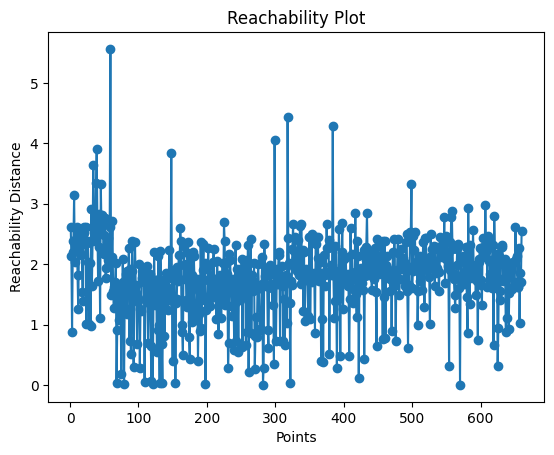

In [23]:
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt

# Aplicar OPTICS al conjunto de embeddings
optics = OPTICS(min_samples=2, xi=0.05, min_cluster_size=0.1)
optics.fit(embeddings)

# Ver los resultados de los clusters
labels = optics.labels_

# Imprimir los clusters asignados a cada mensaje
for i, label in enumerate(labels):
    print(f"Mensaje {i+1} - Cluster: {label}")

# Visualizar el orden de accesibilidad (alcanzabilidad)
plt.plot(optics.reachability_, marker='o')
plt.title("Reachability Plot")
plt.xlabel("Points")
plt.ylabel("Reachability Distance")
plt.show()

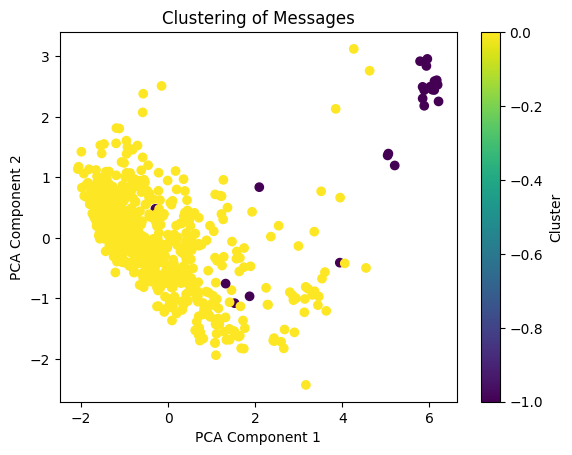

In [24]:
from sklearn.decomposition import PCA

# Reducir a 2 dimensiones para visualización
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Graficar los clusters
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels)
plt.title("Clustering of Messages")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()


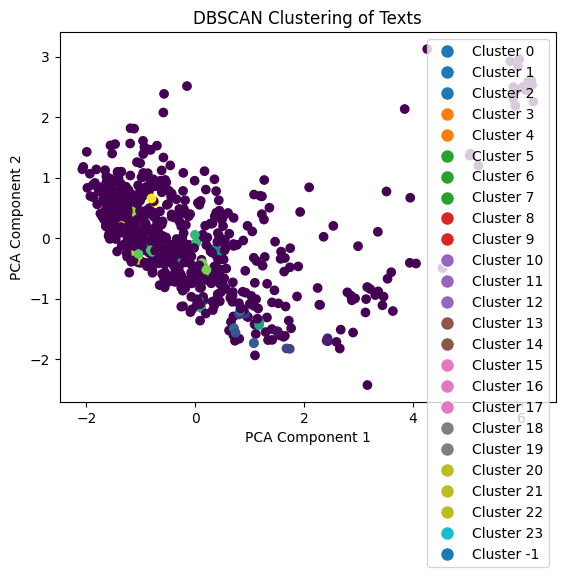

Text: Dear Moniem Here is mobile 39 3357939078 You can reach me within 15 minutes. Emad Shehata Key Account Manager Sent from my mobile. Da Moniem mailto user domain Inviato Monday May 26 2015 05 39 PM A Emad Shehata user domain Cc user domain user domain user domain Oggetto Re International Tender Egypt Cyber War Department MOD Dear Emad thank you for your feedback I may not be able to receive phone calls during coming four hours u200e I appreciate if you can pass your mobile no so that I can call you back. Regards Sent from my BlackBerry. From Emad Shehata Sent Monday 26 May 2015 2 19 PM To user domain user domain Cc user domain user domain user domain Subject R Re International Tender Egypt Cyber War Department MOD Dear Moniem I m in a meeting and available within a couple of hours. I will call you later ok Best regards Emad Shehata Key Account Manager Sent from my mobile. Da Moniem GNSE mailto user domain Inviato Monday May 26 2015 04 15 PM A Emad Shehata Cc Ahmed Mostafa user doma

In [26]:
from sklearn.cluster import DBSCAN
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan.fit(embeddings)

# Visualización con PCA (reducción de dimensionalidad)
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=dbscan.labels_)
plt.title('DBSCAN Clustering of Texts')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Añadir leyenda
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.tab10(i / len(set(dbscan.labels_))), markersize=10) for i in set(dbscan.labels_)], labels=[f'Cluster {i}' for i in set(dbscan.labels_)])
plt.show()

# Asignación de intensidad según el cluster
for i, text in enumerate(data_authority["txt"].tolist()):
    print(f"Text: {text} - Intensity Cluster: {dbscan.labels_[i]}")

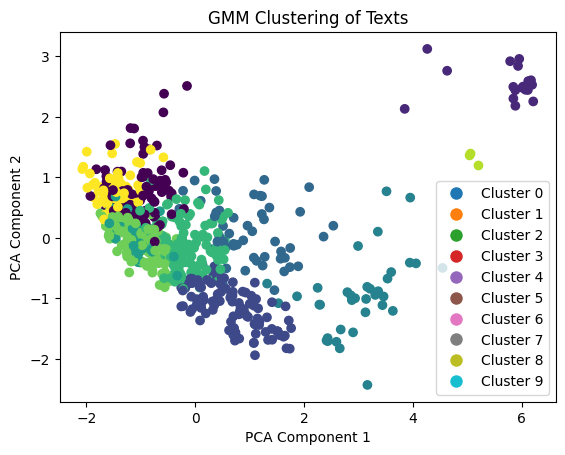

Text: Dear Moniem Here is mobile 39 3357939078 You can reach me within 15 minutes. Emad Shehata Key Account Manager Sent from my mobile. Da Moniem mailto user domain Inviato Monday May 26 2015 05 39 PM A Emad Shehata user domain Cc user domain user domain user domain Oggetto Re International Tender Egypt Cyber War Department MOD Dear Emad thank you for your feedback I may not be able to receive phone calls during coming four hours u200e I appreciate if you can pass your mobile no so that I can call you back. Regards Sent from my BlackBerry. From Emad Shehata Sent Monday 26 May 2015 2 19 PM To user domain user domain Cc user domain user domain user domain Subject R Re International Tender Egypt Cyber War Department MOD Dear Moniem I m in a meeting and available within a couple of hours. I will call you later ok Best regards Emad Shehata Key Account Manager Sent from my mobile. Da Moniem GNSE mailto user domain Inviato Monday May 26 2015 04 15 PM A Emad Shehata Cc Ahmed Mostafa user doma

In [29]:
from sklearn.mixture import GaussianMixture

# Aplicar GMM
num_clusters = 10
gmm = GaussianMixture(n_components=num_clusters, random_state=42)  # Puedes cambiar el número de componentes
gmm.fit(embeddings)

# Visualización con PCA (reducción de dimensionalidad)
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=gmm.predict(embeddings))
plt.title('GMM Clustering of Texts')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Añadir leyenda
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.tab10(i / num_clusters), markersize=10) for i in range(num_clusters)], labels=[f'Cluster {i}' for i in range(num_clusters)])
plt.show()

# Asignación de intensidad según el cluster
for i, text in enumerate(data_authority["txt"].tolist()):
    print(f"Text: {text} - Intensity Cluster: {gmm.predict(embeddings)[i]}")

# Analisis uno or uno

## KMEAns

In [43]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.stats as stats

# Suponiendo que ya tienes tus embeddings y datos cargados en 'embeddings' y 'data_authority'

# 1. Calcular las distancias a los centros de los clústeres
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(embeddings)

distances_to_centers = np.linalg.norm(embeddings - kmeans.cluster_centers_[kmeans.labels_], axis=1)

# 2. Normalizar las distancias a la escala de 1 a 10
scaler = MinMaxScaler(feature_range=(1, 10))
distances_normalized = scaler.fit_transform(distances_to_centers.reshape(-1, 1))

# 3. Crear un DataFrame con los resultados de las intensidades
results = pd.DataFrame({
    'Text': data_authority["txt"].tolist(),  # Asegúrate de tener el DataFrame con tus datos
    'Intensity': distances_normalized.flatten(),
    'Cluster': kmeans.labels_
})

# 4. Calcular el rango de intensidad para cada grupo
cluster_ranges = {}
for cluster in np.unique(kmeans.labels_):
    intensities_for_cluster = results[results['Cluster'] == cluster]['Intensity']
    min_intensity = intensities_for_cluster.min()
    max_intensity = intensities_for_cluster.max()
    cluster_ranges[cluster] = (min_intensity, max_intensity)

# 5. Asignar el rango de intensidad a cada texto
def get_intensity_range(cluster):
    min_intensity, max_intensity = cluster_ranges[cluster]
    return f"Grupo {cluster + 1}, intensidad de {min_intensity:.2f} a {max_intensity:.2f}"

results['Intensity Range'] = results['Cluster'].apply(get_intensity_range)

# 6. Calcular las métricas de calidad del agrupamiento
cohesion_scores = {}
separation_scores = {}
silhouette_scores = {}

for cluster in np.unique(kmeans.labels_):
    # Calcular cohesión
    cluster_data = embeddings[kmeans.labels_ == cluster]
    cohesion = np.mean(np.linalg.norm(cluster_data - np.mean(cluster_data, axis=0), axis=1))
    cohesion_scores[cluster] = cohesion
    
    # Calcular separación
    other_clusters_data = embeddings[kmeans.labels_ != cluster]
    separation = np.mean(np.linalg.norm(cluster_data - other_clusters_data.mean(axis=0), axis=1))
    separation_scores[cluster] = separation
    
    # Calcular la puntuación de Silhouette
    silhouette = silhouette_score(embeddings, kmeans.labels_)
    silhouette_scores[cluster] = silhouette

# 7. Calcular las métricas adicionales (promedio, desviación estándar, varianza, kurtosis)
group_metrics = []

for cluster in np.unique(kmeans.labels_):
    # Filtrar las intensidades del grupo
    intensities_for_cluster = results[results['Cluster'] == cluster]['Intensity']
    
    # Calcular las métricas
    avg_intensity = intensities_for_cluster.mean()
    std_dev_intensity = intensities_for_cluster.std()
    variance_intensity = intensities_for_cluster.var()
    kurtosis_intensity = stats.kurtosis(intensities_for_cluster)
    min_intensity = intensities_for_cluster.min()
    max_intensity = intensities_for_cluster.max()
    
    # Obtener el rango de intensidad
    intensity_range = f"De {min_intensity:.2f} a {max_intensity:.2f}"
    
    # Obtener las métricas de calidad del agrupamiento
    silhouette_score_value = silhouette_scores[cluster]
    cohesion = cohesion_scores[cluster]
    separation = separation_scores[cluster]
    
    # Añadir todas las métricas al resultado final
    group_metrics.append({
        'Cluster': cluster,
        'Average Silhouette Score': silhouette_score_value,
        'Cohesion': cohesion,
        'Separation': separation,
        'Average Intensity': avg_intensity,
        'Standard Deviation': std_dev_intensity,
        'Variance': variance_intensity,
        'Kurtosis': kurtosis_intensity,
        'Intensity Range': intensity_range
    })

# 8. Crear el DataFrame final con todas las métricas
metrics_df = pd.DataFrame(group_metrics)

# Mostrar el DataFrame con todas las métricas
metrics_df


,Cluster,Average Silhouette Score,Cohesion,Separation,Average Intensity,Standard Deviation,Variance,Kurtosis,Intensity Range
0,0,0.092644,1.953506,2.578164,3.420781,0.818009,0.669139,1.603973,De 1.85 a 6.35
1,1,0.092644,1.424443,6.944077,2.411049,2.351824,5.531075,3.311687,De 1.14 a 9.61
2,2,0.092644,1.680780,2.378678,2.900275,0.623379,0.388602,0.357011,De 1.75 a 4.94
3,3,0.092644,2.311540,2.784297,4.104097,0.922209,0.850469,3.961742,De 2.78 a 7.77
4,4,0.092644,2.512800,4.407193,4.488207,1.804241,3.255287,1.653829,De 2.41 a 10.00
5,5,0.092644,1.661769,2.365244,2.863992,0.909655,0.827473,-0.474945,De 1.48 a 5.00
6,6,0.092644,1.980948,2.115837,3.473155,0.805052,0.648109,5.929805,De 2.26 a 7.57
7,7,0.092644,1.847383,2.341197,3.218242,0.574014,0.329492,-0.403066,De 2.13 a 4.63
8,8,0.092644,0.815462,7.419208,1.248793,0.278139,0.077361,-1.499999,De 1.00 a 1.55
9,9,0.092644,2.153292,2.987709,3.802078,0.629732,0.396562,0.955016,De 2.89 a 5.74


In [45]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Suponiendo que ya tienes tus embeddings y datos cargados en 'embeddings' y 'data_authority'

# 1. Definir el pipeline para el procesamiento de datos
scaler = StandardScaler()
pca = PCA(n_components=2)  # Si deseas usar PCA para reducción de dimensionalidad

# 2. Lista de algoritmos de agrupamiento a probar
clustering_algorithms = {
    'KMeans': KMeans(n_clusters=10, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'OPTICS': OPTICS(min_samples=5, xi=0.05),
    'GMM': GaussianMixture(n_components=10, random_state=42)
}

# 3. Función para calcular las métricas de calidad del agrupamiento
def evaluate_clustering_algorithm(algorithm, embeddings, data_authority):
    # Ajustar el algoritmo al conjunto de datos
    algorithm.fit(embeddings)
    
    # Obtener las etiquetas de los clústeres y las distancias a los centros
    labels = algorithm.labels_ if hasattr(algorithm, 'labels_') else None
    if labels is None:
        labels = algorithm.predict(embeddings)  # En caso de GMM, usamos 'predict' para obtener las etiquetas
    
    # 4. Calcular las distancias a los centros de los clústeres (para KMeans)
    if isinstance(algorithm, KMeans):
        distances_to_centers = np.linalg.norm(embeddings - algorithm.cluster_centers_[labels], axis=1)
    else:
        distances_to_centers = np.linalg.norm(embeddings - np.mean(embeddings, axis=0), axis=1)  # Aproximación

    # 5. Normalizar las distancias a la escala de 1 a 10
    scaler = MinMaxScaler(feature_range=(1, 10))
    distances_normalized = scaler.fit_transform(distances_to_centers.reshape(-1, 1))

    # 6. Crear un DataFrame con los resultados de las intensidades
    results = pd.DataFrame({
        'Text': data_authority["txt"].tolist(),
        'Intensity': distances_normalized.flatten(),
        'Cluster': labels
    })

    # 7. Calcular las métricas de calidad del agrupamiento
    cluster_metrics = []
    for cluster in np.unique(labels):
        intensities_for_cluster = results[results['Cluster'] == cluster]['Intensity']
        
        # Calcular las métricas
        avg_intensity = intensities_for_cluster.mean()
        std_dev_intensity = intensities_for_cluster.std()
        variance_intensity = intensities_for_cluster.var()
        kurtosis_intensity = stats.kurtosis(intensities_for_cluster)
        min_intensity = intensities_for_cluster.min()
        max_intensity = intensities_for_cluster.max()

        # Obtener el rango de intensidad
        intensity_range = f"De {min_intensity:.2f} a {max_intensity:.2f}"

        # Calcular cohesión, separación y silueta (usando silhouette_score)
        cohesion = np.mean(np.linalg.norm(embeddings[labels == cluster] - np.mean(embeddings[labels == cluster], axis=0), axis=1))
        other_clusters_data = embeddings[labels != cluster]
        separation = np.mean(np.linalg.norm(embeddings[labels == cluster] - other_clusters_data.mean(axis=0), axis=1))
        silhouette_score_value = silhouette_score(embeddings, labels)

        # Añadir las métricas al grupo
        cluster_metrics.append({
            'Cluster': cluster,
            'Average Silhouette Score': silhouette_score_value,
            'Cohesion': cohesion,
            'Separation': separation,
            'Average Intensity': avg_intensity,
            'Standard Deviation': std_dev_intensity,
            'Variance': variance_intensity,
            'Kurtosis': kurtosis_intensity,
            'Intensity Range': intensity_range
        })

    # Crear el DataFrame final con todas las métricas
    metrics_df = pd.DataFrame(cluster_metrics)
    
    return metrics_df

# 8. Evaluar cada algoritmo de agrupamiento
all_metrics = {}

for name, algorithm in clustering_algorithms.items():
    print(f"Evaluando el algoritmo {name}")
    metrics_df = evaluate_clustering_algorithm(algorithm, embeddings, data_authority)
    all_metrics[name] = metrics_df

# Mostrar las métricas de todos los algoritmos
for name, metrics_df in all_metrics.items():
    print(f"\nMétricas para {name}:")
    print(metrics_df)


Evaluando el algoritmo KMeans
Evaluando el algoritmo DBSCAN
Evaluando el algoritmo OPTICS
Evaluando el algoritmo GMM

Métricas para KMeans:
   Cluster  Average Silhouette Score  Cohesion  Separation  Average Intensity  \
0        0                  0.092644  1.953506    2.578164           3.420781   
1        1                  0.092644  1.424443    6.944077           2.411049   
2        2                  0.092644  1.680780    2.378678           2.900275   
3        3                  0.092644  2.311540    2.784297           4.104097   
4        4                  0.092644  2.512800    4.407193           4.488207   
5        5                  0.092644  1.661769    2.365244           2.863992   
6        6                  0.092644  1.980948    2.115837           3.473155   
7        7                  0.092644  1.847383    2.341197           3.218242   
8        8                  0.092644  0.815462    7.419208           1.248793   
9        9                  0.092644  2.153292    

In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from prettytable import PrettyTable

# Suponiendo que ya tienes tus embeddings y datos cargados en 'embeddings' y 'data_authority'

# 1. Definir el pipeline para el procesamiento de datos
scaler = StandardScaler()
pca = PCA(n_components=2)  # Si deseas usar PCA para reducción de dimensionalidad

# 2. Lista de algoritmos de agrupamiento a probar
clustering_algorithms = {
    'KMeans': KMeans(n_clusters=10, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'OPTICS': OPTICS(min_samples=5, xi=0.05),
    'GMM': GaussianMixture(n_components=10, random_state=42)
}

# 3. Función para calcular las métricas de calidad del agrupamiento
def evaluate_clustering_algorithm(algorithm, embeddings, data_authority):
    # Ajustar el algoritmo al conjunto de datos
    algorithm.fit(embeddings)
    
    # Obtener las etiquetas de los clústeres y las distancias a los centros
    labels = algorithm.labels_ if hasattr(algorithm, 'labels_') else None
    if labels is None:
        labels = algorithm.predict(embeddings)  # En caso de GMM, usamos 'predict' para obtener las etiquetas
    
    # 4. Calcular las distancias a los centros de los clústeres (para KMeans)
    if isinstance(algorithm, KMeans):
        distances_to_centers = np.linalg.norm(embeddings - algorithm.cluster_centers_[labels], axis=1)
    else:
        distances_to_centers = np.linalg.norm(embeddings - np.mean(embeddings, axis=0), axis=1)  # Aproximación

    # 5. Normalizar las distancias a la escala de 1 a 10
    scaler = MinMaxScaler(feature_range=(1, 10))
    distances_normalized = scaler.fit_transform(distances_to_centers.reshape(-1, 1))

    # 6. Crear un DataFrame con los resultados de las intensidades
    results = pd.DataFrame({
        'Text': data_authority["txt"].tolist(),
        'Intensity': distances_normalized.flatten(),
        'Cluster': labels
    })

    # 7. Calcular las métricas de calidad del agrupamiento
    cluster_metrics = []
    for cluster in np.unique(labels):
        intensities_for_cluster = results[results['Cluster'] == cluster]['Intensity']
        
        # Calcular las métricas
        avg_intensity = intensities_for_cluster.mean()
        std_dev_intensity = intensities_for_cluster.std()
        variance_intensity = intensities_for_cluster.var()
        kurtosis_intensity = stats.kurtosis(intensities_for_cluster)
        min_intensity = intensities_for_cluster.min()
        max_intensity = intensities_for_cluster.max()

        # Obtener el rango de intensidad
        intensity_range = f"De {min_intensity:.2f} a {max_intensity:.2f}"

        # Calcular cohesión, separación y silueta (usando silhouette_score)
        cohesion = np.mean(np.linalg.norm(embeddings[labels == cluster] - np.mean(embeddings[labels == cluster], axis=0), axis=1))
        other_clusters_data = embeddings[labels != cluster]
        separation = np.mean(np.linalg.norm(embeddings[labels == cluster] - other_clusters_data.mean(axis=0), axis=1))
        silhouette_score_value = silhouette_score(embeddings, labels)

        # Añadir las métricas al grupo
        cluster_metrics.append({
            'Cluster': cluster,
            'Average Silhouette Score': silhouette_score_value,
            'Cohesion': cohesion,
            'Separation': separation,
            'Average Intensity': avg_intensity,
            'Standard Deviation': std_dev_intensity,
            'Variance': variance_intensity,
            'Kurtosis': kurtosis_intensity,
            'Intensity Range': intensity_range
        })

    # Crear el DataFrame final con todas las métricas
    metrics_df = pd.DataFrame(cluster_metrics)
    
    return metrics_df

# 8. Evaluar cada algoritmo de agrupamiento
all_metrics = {}

for name, algorithm in clustering_algorithms.items():
    print(f"\nEvaluando el algoritmo {name}")
    metrics_df = evaluate_clustering_algorithm(algorithm, embeddings, data_authority)
    all_metrics[name] = metrics_df

# Mostrar las métricas de todos los algoritmos usando PrettyTable
for name, metrics_df in all_metrics.items():
    print(f"\nMétricas para {name}:")

    # Crear la tabla con PrettyTable
    table = PrettyTable()
    table.field_names = metrics_df.columns.tolist()

    # Agregar filas de datos a la tabla
    for row in metrics_df.values:
        table.add_row(row)

    # Mostrar la tabla en la consola
    print(table)



Evaluando el algoritmo KMeans

Evaluando el algoritmo DBSCAN

Evaluando el algoritmo OPTICS

Evaluando el algoritmo GMM

Métricas para KMeans:
+---------+--------------------------+--------------------+--------------------+--------------------+--------------------+---------------------+----------------------+-----------------+
| Cluster | Average Silhouette Score |      Cohesion      |     Separation     | Average Intensity  | Standard Deviation |       Variance      |       Kurtosis       | Intensity Range |
+---------+--------------------------+--------------------+--------------------+--------------------+--------------------+---------------------+----------------------+-----------------+
|    0    |   0.09264397621154785    | 1.9535064697265625 | 2.5781638622283936 | 3.420780897140503  | 0.8180094361305237 |  0.6691394448280334 |  1.6039729118347168  |  De 1.85 a 6.35 |
|    1    |   0.09264397621154785    | 1.4244427680969238 | 6.944077014923096  | 2.411048650741577  | 2.35182356

In [47]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score, pairwise_distances
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import scipy.stats as stats
from prettytable import PrettyTable

# Suponiendo que ya tienes tus embeddings y datos cargados en 'embeddings' y 'data_authority'

# 1. Definir el pipeline para el procesamiento de datos
scaler = StandardScaler()
pca = PCA(n_components=2)  # Si deseas usar PCA para reducción de dimensionalidad

# 2. Lista de algoritmos de agrupamiento a probar
clustering_algorithms = {
    'KMeans': KMeans(n_clusters=10, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'OPTICS': OPTICS(min_samples=5, xi=0.05),
    'GMM': GaussianMixture(n_components=10, random_state=42)
}

# 3. Función para calcular las métricas de calidad del agrupamiento
def evaluate_clustering_algorithm(algorithm, embeddings, data_authority):
    # Ajustar el algoritmo al conjunto de datos
    algorithm.fit(embeddings)
    
    # Obtener las etiquetas de los clústeres y las distancias a los centros
    if isinstance(algorithm, OPTICS):
        # OPTICS no tiene un atributo 'labels_' hasta después de ajustar el ordenamiento
        labels = algorithm.labels_
        if len(set(labels)) == 1:  # Si solo hay un único grupo (ruido), se puede omitir la evaluación
            return pd.DataFrame({'Cluster': [], 'Cohesion': [], 'Separation': [], 'Quality Score': []})
    else:
        labels = algorithm.labels_ if hasattr(algorithm, 'labels_') else None
        if labels is None:
            labels = algorithm.predict(embeddings)  # En caso de GMM, usamos 'predict' para obtener las etiquetas
    
    # 4. Calcular las distancias a los centros de los clústeres (para KMeans)
    if isinstance(algorithm, KMeans):
        distances_to_centers = np.linalg.norm(embeddings - algorithm.cluster_centers_[labels], axis=1)
    else:
        distances_to_centers = np.linalg.norm(embeddings - np.mean(embeddings, axis=0), axis=1)  # Aproximación

    # 5. Normalizar las distancias a la escala de 1 a 10
    scaler = MinMaxScaler(feature_range=(1, 10))
    distances_normalized = scaler.fit_transform(distances_to_centers.reshape(-1, 1))

    # 6. Crear un DataFrame con los resultados de las intensidades
    results = pd.DataFrame({
        'Text': data_authority["txt"].tolist(),
        'Intensity': distances_normalized.flatten(),
        'Cluster': labels
    })

    # 7. Evaluar la calidad individual de cada clúster (cohesión, separación y puntuación de calidad)
    def evaluate_cluster_quality(embeddings, labels):
        cluster_quality = []
        for cluster in np.unique(labels):
            if cluster == -1:  # Si el clúster es ruido (solo para DBSCAN y OPTICS)
                continue
            
            # Puntos dentro del clúster
            cluster_points = embeddings[labels == cluster]

            # Cohesión: Promedio de las distancias entre puntos dentro del clúster
            cohesion = np.mean(pairwise_distances(cluster_points))

            # Separación: Promedio de las distancias entre el clúster y otros clústeres
            other_clusters_points = embeddings[labels != cluster]
            separation = np.mean(pairwise_distances(cluster_points, other_clusters_points))

            # Índice de calidad
            quality = separation / cohesion

            cluster_quality.append({
                'Cluster': cluster,
                'Cohesion': cohesion,
                'Separation': separation,
                'Quality Score': quality
            })

        # Crear un DataFrame con los resultados
        cluster_quality_df = pd.DataFrame(cluster_quality)
        return cluster_quality_df

    # 8. Evaluar la calidad del agrupamiento por cada clúster
    cluster_quality_df = evaluate_cluster_quality(embeddings, labels)
    
    return cluster_quality_df

# 9. Evaluar cada algoritmo de agrupamiento
all_cluster_qualities = {}

for name, algorithm in clustering_algorithms.items():
    print(f"Evaluando el algoritmo {name}")
    metrics_df = evaluate_clustering_algorithm(algorithm, embeddings, data_authority)
    all_cluster_qualities[name] = metrics_df

# Función para imprimir las métricas usando PrettyTable
def print_pretty_table(metrics_df, algorithm_name):
    table = PrettyTable()
    table.field_names = ["Cluster", "Cohesion", "Separation", "Quality Score"]

    for _, row in metrics_df.iterrows():
        table.add_row([row["Cluster"], round(row["Cohesion"], 2), round(row["Separation"], 2), round(row["Quality Score"], 2)])

    print(f"\nMétricas de calidad para {algorithm_name}:")
    print(table)

# Mostrar las métricas de calidad individual para cada algoritmo con PrettyTable
for name, quality_df in all_cluster_qualities.items():
    if not quality_df.empty:  # Solo mostrar la tabla si hay datos
        print_pretty_table(quality_df, name)
    else:
        print(f"No se generaron clústeres válidos para {name} (posiblemente solo ruido).")


Evaluando el algoritmo KMeans
Evaluando el algoritmo DBSCAN
Evaluando el algoritmo OPTICS
Evaluando el algoritmo GMM

Métricas de calidad para KMeans:
+---------+----------+------------+---------------+
| Cluster | Cohesion | Separation | Quality Score |
+---------+----------+------------+---------------+
|   0.0   |   2.76   |    3.67    |      1.33     |
|   1.0   |   1.93   |    7.37    |      3.81     |
|   2.0   |   2.36   |    3.63    |      1.54     |
|   3.0   |   3.25   |    3.89    |      1.2      |
|   4.0   |   3.54   |    5.11    |      1.44     |
|   5.0   |   2.32   |    3.51    |      1.51     |
|   6.0   |   2.81   |    3.48    |      1.24     |
|   7.0   |   2.61   |    3.53    |      1.35     |
|   8.0   |   0.94   |    7.89    |      8.39     |
|   9.0   |   3.02   |    3.91    |      1.29     |
+---------+----------+------------+---------------+

Métricas de calidad para DBSCAN:
+---------+----------+------------+---------------+
| Cluster | Cohesion | Separation |

In [48]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from prettytable import PrettyTable

# Suponiendo que ya tienes tus embeddings y datos cargados en 'embeddings' y 'data_authority'

# 1. Definir el pipeline para el procesamiento de datos
scaler = StandardScaler()
pca = PCA(n_components=2)  # Si deseas usar PCA para reducción de dimensionalidad

# 2. Lista de algoritmos de agrupamiento a probar
clustering_algorithms = {
    'KMeans': KMeans(n_clusters=10, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'OPTICS': OPTICS(min_samples=5, xi=0.05),
    'GMM': GaussianMixture(n_components=10, random_state=42)
}

# 3. Función para calcular las métricas de calidad del agrupamiento
def evaluate_clustering_algorithm(algorithm, embeddings, data_authority):
    # Ajustar el algoritmo al conjunto de datos
    algorithm.fit(embeddings)
    
    # Obtener las etiquetas de los clústeres y las distancias a los centros
    labels = algorithm.labels_ if hasattr(algorithm, 'labels_') else None
    if labels is None:
        labels = algorithm.predict(embeddings)  # En caso de GMM, usamos 'predict' para obtener las etiquetas
    
    # 4. Calcular las distancias a los centros de los clústeres (para KMeans)
    if isinstance(algorithm, KMeans):
        distances_to_centers = np.linalg.norm(embeddings - algorithm.cluster_centers_[labels], axis=1)
    else:
        distances_to_centers = np.linalg.norm(embeddings - np.mean(embeddings, axis=0), axis=1)  # Aproximación

    # 5. Normalizar las distancias a la escala de 1 a 10
    scaler = MinMaxScaler(feature_range=(1, 10))
    distances_normalized = scaler.fit_transform(distances_to_centers.reshape(-1, 1))

    # 6. Crear un DataFrame con los resultados de las intensidades
    results = pd.DataFrame({
        'Text': data_authority["txt"].tolist(),
        'Intensity': distances_normalized.flatten(),
        'Cluster': labels
    })

    # 7. Calcular las métricas de calidad del agrupamiento
    cluster_metrics = []
    for cluster in np.unique(labels):
        intensities_for_cluster = results[results['Cluster'] == cluster]['Intensity']
        
        # Calcular las métricas
        avg_intensity = intensities_for_cluster.mean()
        std_dev_intensity = intensities_for_cluster.std()
        variance_intensity = intensities_for_cluster.var()
        kurtosis_intensity = stats.kurtosis(intensities_for_cluster)
        min_intensity = intensities_for_cluster.min()
        max_intensity = intensities_for_cluster.max()

        # Obtener el rango de intensidad
        intensity_range = f"De {min_intensity:.2f} a {max_intensity:.2f}"

        # Calcular cohesión, separación y silueta (usando silhouette_score)
        cohesion = np.mean(np.linalg.norm(embeddings[labels == cluster] - np.mean(embeddings[labels == cluster], axis=0), axis=1))
        other_clusters_data = embeddings[labels != cluster]
        separation = np.mean(np.linalg.norm(embeddings[labels == cluster] - other_clusters_data.mean(axis=0), axis=1))
        silhouette_score_value = silhouette_score(embeddings, labels)

        # Cálculo del Quality Score (ejemplo basado en un ponderado simple)
        quality_score = (cohesion + separation + silhouette_score_value) / 3  # Ajusta la fórmula según lo que desees

        # Añadir las métricas al grupo
        cluster_metrics.append({
            'Cluster': cluster,
            'Average Silhouette Score': silhouette_score_value,
            'Cohesion': cohesion,
            'Separation': separation,
            'Average Intensity': avg_intensity,
            'Standard Deviation': std_dev_intensity,
            'Variance': variance_intensity,
            'Kurtosis': kurtosis_intensity,
            'Intensity Range': intensity_range,
            'Quality Score': quality_score
        })

    # Crear el DataFrame final con todas las métricas
    metrics_df = pd.DataFrame(cluster_metrics)
    
    return metrics_df

# 8. Evaluar cada algoritmo de agrupamiento
all_metrics = {}

for name, algorithm in clustering_algorithms.items():
    print(f"\nEvaluando el algoritmo {name}")
    metrics_df = evaluate_clustering_algorithm(algorithm, embeddings, data_authority)
    all_metrics[name] = metrics_df

# Mostrar las métricas de todos los algoritmos usando PrettyTable
for name, metrics_df in all_metrics.items():
    print(f"\nMétricas para {name}:")

    # Crear la tabla con PrettyTable
    table = PrettyTable()
    table.field_names = metrics_df.columns.tolist()

    # Agregar filas de datos a la tabla
    for row in metrics_df.values:
        table.add_row(row)

    # Mostrar la tabla en la consola
    print(table)



Evaluando el algoritmo KMeans

Evaluando el algoritmo DBSCAN

Evaluando el algoritmo OPTICS

Evaluando el algoritmo GMM

Métricas para KMeans:
+---------+--------------------------+--------------------+--------------------+--------------------+--------------------+---------------------+----------------------+-----------------+--------------------+
| Cluster | Average Silhouette Score |      Cohesion      |     Separation     | Average Intensity  | Standard Deviation |       Variance      |       Kurtosis       | Intensity Range |   Quality Score    |
+---------+--------------------------+--------------------+--------------------+--------------------+--------------------+---------------------+----------------------+-----------------+--------------------+
|    0    |   0.09264397621154785    | 1.9535064697265625 | 2.5781638622283936 | 3.420780897140503  | 0.8180094361305237 |  0.6691394448280334 |  1.6039729118347168  |  De 1.85 a 6.35 | 1.541438102722168  |
|    1    |   0.092643976211

In [49]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from prettytable import PrettyTable

# Suponiendo que ya tienes tus embeddings y datos cargados en 'embeddings' y 'data_authority'

# 1. Definir el pipeline para el procesamiento de datos
scaler = StandardScaler()
pca = PCA(n_components=2)  # Si deseas usar PCA para reducción de dimensionalidad

# 2. Lista de algoritmos de agrupamiento a probar
clustering_algorithms = {
    'KMeans': KMeans(n_clusters=10, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'OPTICS': OPTICS(min_samples=5, xi=0.05),
    'GMM': GaussianMixture(n_components=10, random_state=42)
}

# 3. Función para calcular las métricas de calidad del agrupamiento
def evaluate_clustering_algorithm(algorithm, embeddings, data_authority):
    # Ajustar el algoritmo al conjunto de datos
    algorithm.fit(embeddings)
    
    # Obtener las etiquetas de los clústeres y las distancias a los centros
    labels = algorithm.labels_ if hasattr(algorithm, 'labels_') else None
    if labels is None:
        labels = algorithm.predict(embeddings)  # En caso de GMM, usamos 'predict' para obtener las etiquetas
    
    # 4. Calcular las distancias a los centros de los clústeres (para KMeans)
    if isinstance(algorithm, KMeans):
        distances_to_centers = np.linalg.norm(embeddings - algorithm.cluster_centers_[labels], axis=1)
    else:
        distances_to_centers = np.linalg.norm(embeddings - np.mean(embeddings, axis=0), axis=1)  # Aproximación

    # 5. Normalizar las distancias a la escala de 1 a 10
    scaler = MinMaxScaler(feature_range=(1, 10))
    distances_normalized = scaler.fit_transform(distances_to_centers.reshape(-1, 1))

    # 6. Crear un DataFrame con los resultados de las intensidades
    results = pd.DataFrame({
        'Text': data_authority["txt"].tolist(),
        'Intensity': distances_normalized.flatten(),
        'Cluster': labels
    })

    # 7. Calcular las métricas de calidad del agrupamiento
    cluster_metrics = []
    total_samples = len(embeddings)  # Número total de muestras
    
    for cluster in np.unique(labels):
        intensities_for_cluster = results[results['Cluster'] == cluster]['Intensity']
        
        # Calcular las métricas
        avg_intensity = intensities_for_cluster.mean()
        std_dev_intensity = intensities_for_cluster.std()
        variance_intensity = intensities_for_cluster.var()
        kurtosis_intensity = stats.kurtosis(intensities_for_cluster)
        min_intensity = intensities_for_cluster.min()
        max_intensity = intensities_for_cluster.max()

        # Obtener el rango de intensidad
        intensity_range = f"De {min_intensity:.2f} a {max_intensity:.2f}"

        # Calcular cohesión, separación y silueta (usando silhouette_score)
        cohesion = np.mean(np.linalg.norm(embeddings[labels == cluster] - np.mean(embeddings[labels == cluster], axis=0), axis=1))
        other_clusters_data = embeddings[labels != cluster]
        separation = np.mean(np.linalg.norm(embeddings[labels == cluster] - other_clusters_data.mean(axis=0), axis=1))
        silhouette_score_value = silhouette_score(embeddings, labels)

        # Cálculo del Quality Score (ejemplo basado en un ponderado simple)
        quality_score = (cohesion + separation + silhouette_score_value) / 3  # Ajusta la fórmula según lo que desees

        # Calcular el número de muestras en el clúster
        cluster_size = np.sum(labels == cluster)
        
        # Añadir las métricas al grupo
        cluster_metrics.append({
            'Cluster': cluster,
            'Average Silhouette Score': silhouette_score_value,
            'Cohesion': cohesion,
            'Separation': separation,
            'Average Intensity': avg_intensity,
            'Standard Deviation': std_dev_intensity,
            'Variance': variance_intensity,
            'Kurtosis': kurtosis_intensity,
            'Intensity Range': intensity_range,
            'Quality Score': quality_score,
            'Cluster Size': f'{cluster_size}/{total_samples}'  # Formato "10/490"
        })

    # Crear el DataFrame final con todas las métricas
    metrics_df = pd.DataFrame(cluster_metrics)
    
    return metrics_df

# 8. Evaluar cada algoritmo de agrupamiento
all_metrics = {}

for name, algorithm in clustering_algorithms.items():
    print(f"\nEvaluando el algoritmo {name}")
    metrics_df = evaluate_clustering_algorithm(algorithm, embeddings, data_authority)
    all_metrics[name] = metrics_df

# Mostrar las métricas de todos los algoritmos usando PrettyTable
for name, metrics_df in all_metrics.items():
    print(f"\nMétricas para {name}:")

    # Crear la tabla con PrettyTable
    table = PrettyTable()
    table.field_names = metrics_df.columns.tolist()

    # Agregar filas de datos a la tabla
    for row in metrics_df.values:
        table.add_row(row)

    # Mostrar la tabla en la consola
    print(table)



Evaluando el algoritmo KMeans

Evaluando el algoritmo DBSCAN

Evaluando el algoritmo OPTICS

Evaluando el algoritmo GMM

Métricas para KMeans:
+---------+--------------------------+--------------------+--------------------+--------------------+--------------------+---------------------+----------------------+-----------------+--------------------+--------------+
| Cluster | Average Silhouette Score |      Cohesion      |     Separation     | Average Intensity  | Standard Deviation |       Variance      |       Kurtosis       | Intensity Range |   Quality Score    | Cluster Size |
+---------+--------------------------+--------------------+--------------------+--------------------+--------------------+---------------------+----------------------+-----------------+--------------------+--------------+
|    0    |   0.09264397621154785    | 1.9535064697265625 | 2.5781638622283936 | 3.420780897140503  | 0.8180094361305237 |  0.6691394448280334 |  1.6039729118347168  |  De 1.85 a 6.35 | 1.54


Evaluando KMeans
   Cluster  Average Intensity Intensity Range  Cohesion  Silhouette Score  \
0        0           3.420781     1.85 - 6.35  1.953506          0.092644   
1        1           2.411049     1.14 - 9.61  1.424443          0.092644   
2        2           2.900275     1.75 - 4.94  1.680780          0.092644   
3        3           4.104097     2.78 - 7.77  2.311540          0.092644   
4        4           4.488207    2.41 - 10.00  2.512800          0.092644   
5        5           2.863992     1.48 - 5.00  1.661769          0.092644   
6        6           3.473155     2.26 - 7.57  1.980948          0.092644   
7        7           3.218242     2.13 - 4.63  1.847383          0.092644   
8        8           1.248793     1.00 - 1.55  0.815462          0.092644   
9        9           3.802078     2.89 - 5.74  2.153292          0.092644   

  Cluster Size  Average Intensity Normalized  
0       96/661                      7.034390  
1       22/661                      4.22

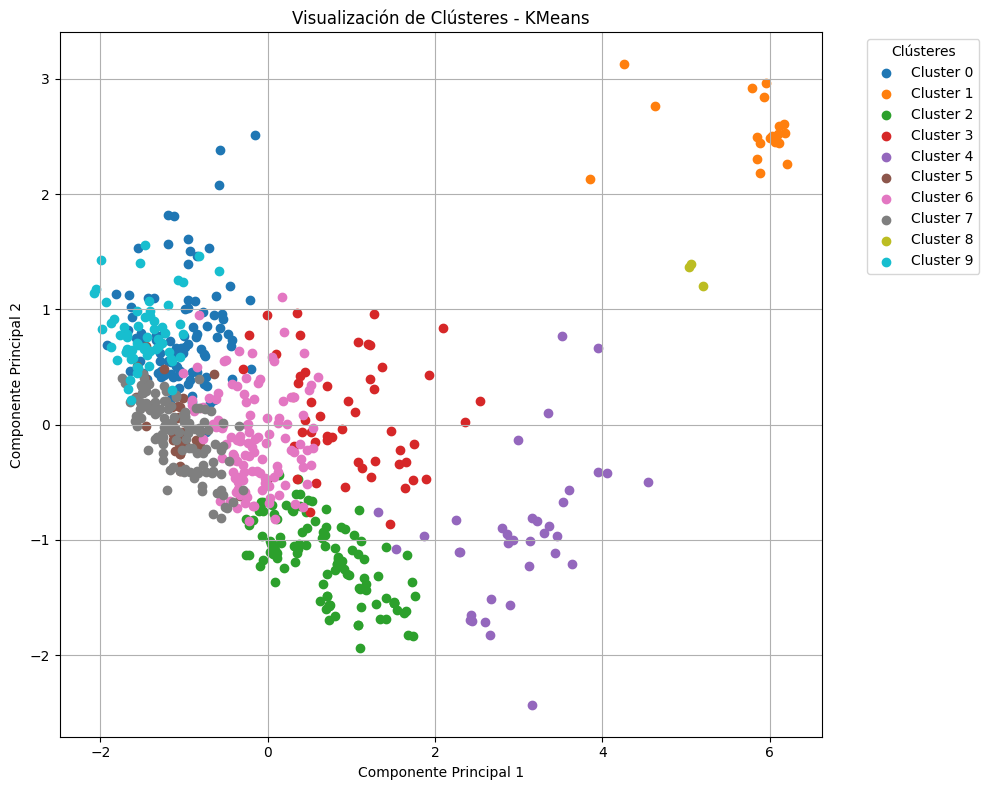


Evaluando DBSCAN
   Cluster  Average Intensity Intensity Range  Cohesion  Silhouette Score  \
0       -1           2.925396    1.00 - 10.00       NaN         -0.069762   
1        0           2.430292     2.42 - 2.44  0.034356         -0.069762   

  Cluster Size  Average Intensity Normalized  
0      656/661                          10.0  
1        5/661                           1.0  


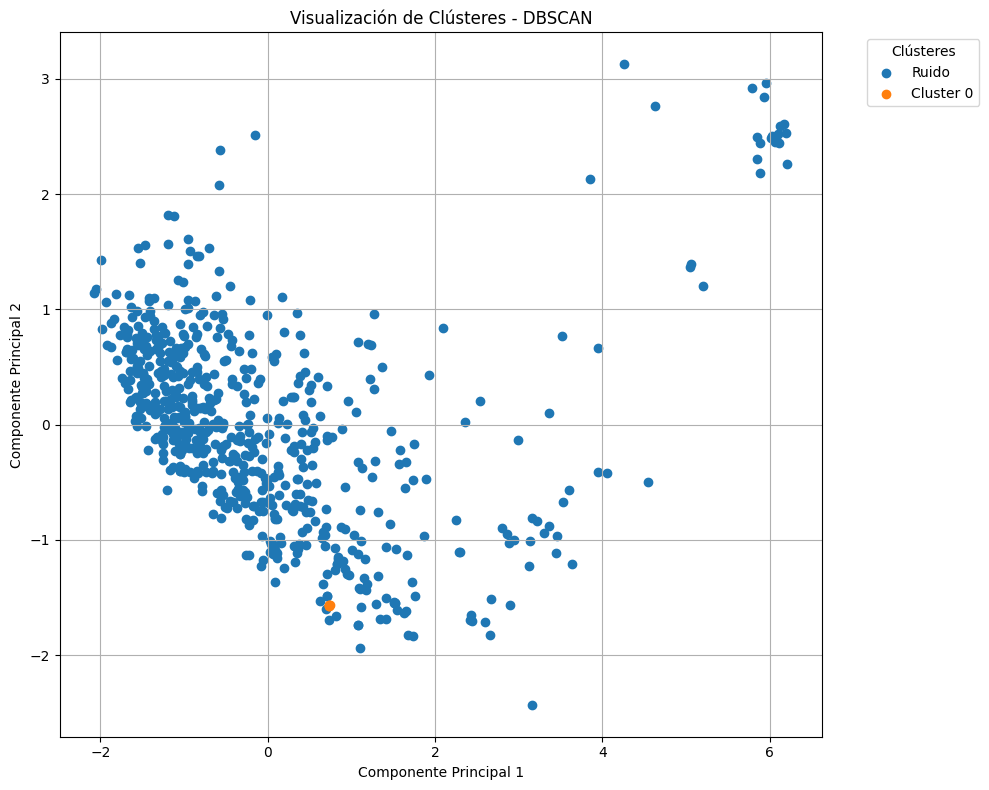


Evaluando OPTICS
    Cluster  Average Intensity Intensity Range  Cohesion  Silhouette Score  \
0        -1           2.772203    1.00 - 10.00       NaN         -0.165754   
1         0           1.794441     1.30 - 2.07  0.990634         -0.165754   
2         1           2.349931     2.09 - 2.44  0.573597         -0.165754   
3         2           1.323713     1.21 - 1.46  0.759389         -0.165754   
4         3           1.681198     1.39 - 2.02  1.127973         -0.165754   
5         4           1.613712     1.51 - 1.88  0.397658         -0.165754   
6         5           2.519167     1.94 - 2.83  0.747611         -0.165754   
7         6           2.212883     1.92 - 2.48  1.109471         -0.165754   
8         7           2.660726     2.60 - 2.77  0.813743         -0.165754   
9         8           5.024526     4.54 - 5.91  1.210933         -0.165754   
10        9           9.088066     8.68 - 9.37  0.683505         -0.165754   

   Cluster Size  Average Intensity Normalized

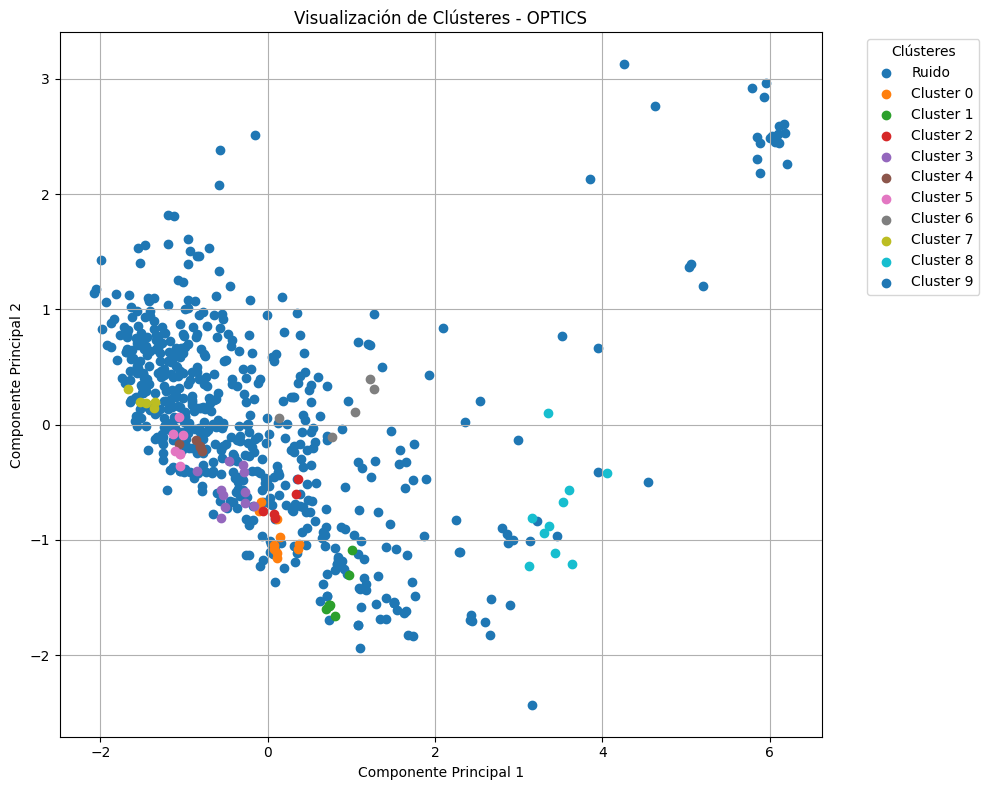


Evaluando GMM
   Cluster  Average Intensity Intensity Range  Cohesion  Silhouette Score  \
0        0           8.236986     8.24 - 8.24  1.953506          0.092644   
1        1           2.480122     2.48 - 2.48  1.424443          0.092644   
2        2           8.438982     8.12 - 8.46  1.680780          0.092644   
3        3           5.265708     5.27 - 5.27  2.311540          0.092644   
4        4           3.870479     3.87 - 3.87  2.512800          0.092644   
5        5           3.510142     3.39 - 3.52  1.661769          0.092644   
6        6           9.809763     9.81 - 9.81  1.980948          0.092644   
7        7           9.999805   10.00 - 10.00  1.847383          0.092644   
8        8           1.000000     1.00 - 1.00  0.815462          0.092644   
9        9           5.806360     5.59 - 5.81  2.153292          0.092644   

  Cluster Size  Average Intensity Normalized  
0       96/661                      8.237143  
1       22/661                      2.48015

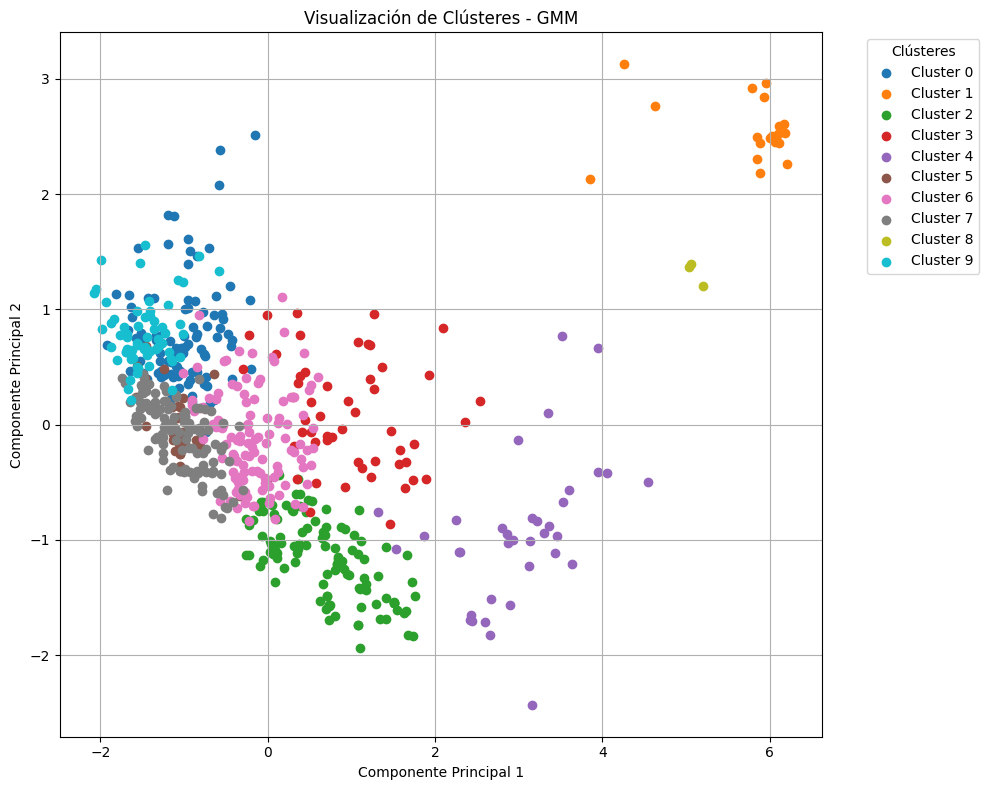

In [52]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Función para evaluar un algoritmo de clustering
def evaluate_clustering_algorithm(algorithm, embeddings, data_authority):
    # Ajustar el algoritmo al conjunto de datos
    algorithm.fit(embeddings)
    
    # Obtener etiquetas de los clústeres
    labels = algorithm.labels_ if hasattr(algorithm, 'labels_') else algorithm.predict(embeddings)
    
    # Calcular distancias a los centros (si aplica)
    if isinstance(algorithm, KMeans):
        distances_to_centers = np.linalg.norm(embeddings - algorithm.cluster_centers_[labels], axis=1)
    elif isinstance(algorithm, GaussianMixture):
        distances_to_centers = -algorithm.score_samples(embeddings)
    else:
        distances_to_centers = np.linalg.norm(embeddings - np.mean(embeddings, axis=0), axis=1)
    
    # Normalizar las distancias entre 1 y 10
    scaler = MinMaxScaler(feature_range=(1, 10))
    distances_normalized = scaler.fit_transform(distances_to_centers.reshape(-1, 1)).flatten()
    
    # Crear DataFrame de resultados
    results = pd.DataFrame({
        'Text': data_authority["txt"].tolist(),
        'Intensity': distances_normalized,
        'Cluster': labels
    })

    # Calcular métricas por clúster
    cluster_metrics = []
    total_samples = len(embeddings)
    
    for cluster in np.unique(labels):
        intensities = results[results['Cluster'] == cluster]['Intensity']
        avg_intensity = intensities.mean()
        std_dev_intensity = intensities.std()
        intensity_range = f"{intensities.min():.2f} - {intensities.max():.2f}"
        cohesion = (
            np.mean(
                np.linalg.norm(embeddings[labels == cluster] - np.mean(embeddings[labels == cluster], axis=0), axis=1)
            ) if cluster != -1 else np.nan  # Ignorar cohesión para ruido
        )
        silhouette_value = silhouette_score(embeddings, labels) if len(np.unique(labels)) > 1 else np.nan
        cluster_size = np.sum(labels == cluster)
        
        cluster_metrics.append({
            'Cluster': cluster,
            'Average Intensity': avg_intensity,
            'Intensity Range': intensity_range,
            'Cohesion': cohesion,
            'Silhouette Score': silhouette_value,
            'Cluster Size': f'{cluster_size}/{total_samples}'
        })
    
    # Crear DataFrame con métricas
    metrics_df = pd.DataFrame(cluster_metrics)
    
    # Añadir columna "Average Intensity Normalized" al DataFrame original
    scaler_avg = MinMaxScaler(feature_range=(1, 10))
    metrics_df['Average Intensity Normalized'] = scaler_avg.fit_transform(metrics_df[['Average Intensity']])
    
    return results, metrics_df, labels

# Visualización de los clústeres
def plot_clusters(embeddings, labels, title="Visualización de Clústeres"):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(embeddings)
    
    plt.figure(figsize=(10, 8))
    unique_clusters = np.unique(labels)
    for cluster in unique_clusters:
        cluster_data = reduced_data[labels == cluster]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {cluster}" if cluster != -1 else "Ruido")
    
    plt.title(title)
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.legend(title="Clústeres", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.tight_layout()
    plt.show()

# Pipeline para evaluar múltiples algoritmos
def clustering_pipeline(embeddings, data_authority):
    algorithms = {
        'KMeans': KMeans(n_clusters=10, random_state=42),
        'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
        'OPTICS': OPTICS(min_samples=5, cluster_method='xi'),
        'GMM': GaussianMixture(n_components=10, random_state=42)
    }
    
    for name, algorithm in algorithms.items():
        print(f"\nEvaluando {name}")
        results, metrics_df, labels = evaluate_clustering_algorithm(algorithm, embeddings, data_authority)
        
        # Mostrar métricas
        print(metrics_df)
        
        # Visualizar clústeres
        plot_clusters(embeddings, labels, title=f"Visualización de Clústeres - {name}")

# Ejemplo de uso
# Supongamos que 'embeddings' es tu matriz de datos y 'data_authority' contiene los textos originales
# embeddings = ... # Carga tus datos aquí
# data_authority = ... # Carga tus textos aquí
clustering_pipeline(embeddings, data_authority)
